In [19]:
# cell 1 1. Import Libraries
# Import library
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import time
import os

In [20]:
# Cell 2 2. Check Working Directory and Load Dataset
# Periksa direktori kerja
print("Direktori kerja saat ini:", os.getcwd())

# 1. Membaca dataset
try:
    dataset = pd.read_csv('dataset_stres_mahasiswa.csv')
    print("Dataset berhasil dibaca!")
    print("Dataset (5 baris pertama):")
    print(dataset.head())
except FileNotFoundError:
    print("Error: File 'dataset_stres_mahasiswa.csv' tidak ditemukan!")
    raise

Direktori kerja saat ini: d:\Tugas KecKom\Praktikum 2 (Fuzzy)\1.Program\Percobaan 4
Dataset berhasil dibaca!
Dataset (5 baris pertama):
    ID_Mahasiswa  Beban_Tugas  Jam_Tidur Tingkat_Stres
0  Mahasiswa_522          5.0        6.3        Sedang
1  Mahasiswa_738          8.0        3.7        Tinggi
2  Mahasiswa_741          9.5        1.5        Tinggi
3  Mahasiswa_661          4.7        5.3        Sedang
4  Mahasiswa_412          5.0        5.8        Sedang


In [21]:
# cell 3 3. Data Preprocessing
# Konversi Tingkat_Stres ke numerik
def stres_to_numeric(stres):
    if stres == 'Rendah':
        return 20
    elif stres == 'Sedang':
        return 50
    else:
        return 80

dataset['Tingkat_Stres_Numeric'] = dataset['Tingkat_Stres'].apply(stres_to_numeric)

In [22]:
# Cell 4 4. Fuzzy Variable Definition
# 2. Definisikan variabel fuzzy
beban_tugas = ctrl.Antecedent(np.arange(0, 11, 0.1), 'Beban_Tugas')
jam_tidur = ctrl.Antecedent(np.arange(0, 13, 0.1), 'Jam_Tidur')
stres = ctrl.Consequent(np.arange(0, 101, 0.5), 'Stres')

# Fungsi keanggotaan
beban_tugas['Ringan'] = fuzz.trimf(beban_tugas.universe, [0, 0, 4])
beban_tugas['Sedang'] = fuzz.trimf(beban_tugas.universe, [3, 5, 7])
beban_tugas['Berat'] = fuzz.trimf(beban_tugas.universe, [6, 10, 10])

jam_tidur['Sedikit'] = fuzz.trimf(jam_tidur.universe, [0, 0, 4])
jam_tidur['Cukup'] = fuzz.trimf(jam_tidur.universe, [3, 6, 9])
jam_tidur['Banyak'] = fuzz.trimf(jam_tidur.universe, [8, 12, 12])

stres['Rendah'] = fuzz.trimf(stres.universe, [0, 0, 40])
stres['Sedang'] = fuzz.trimf(stres.universe, [30, 50, 70])
stres['Tinggi'] = fuzz.trimf(stres.universe, [60, 100, 100])

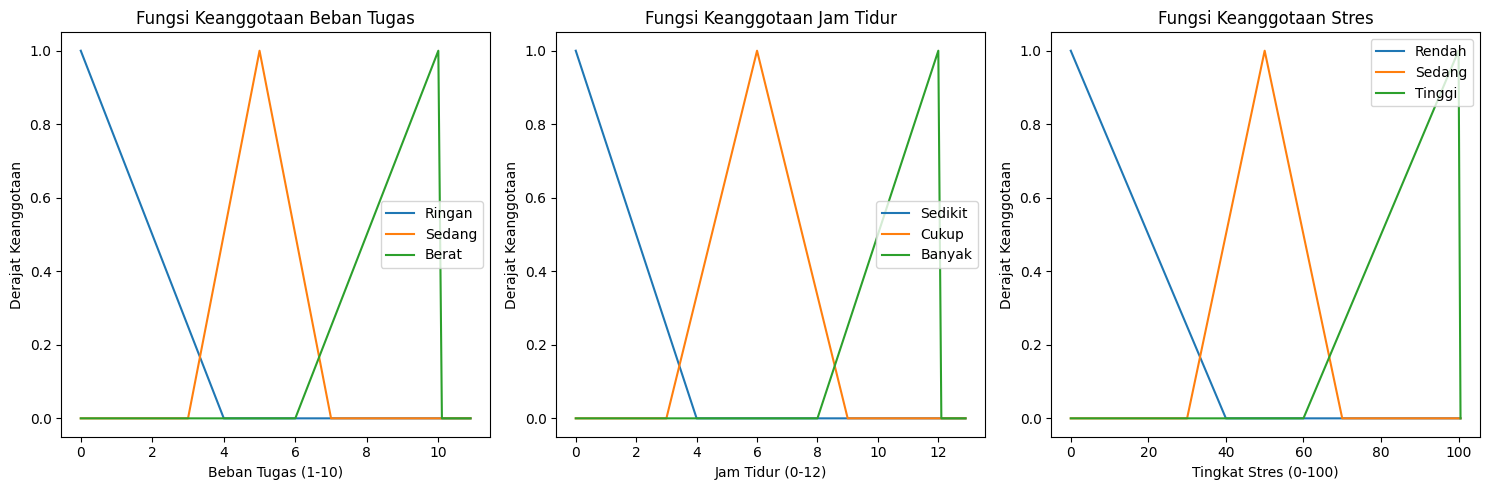

In [23]:
# cell 5 5. Membership Function Visualization
# Visualisasi fungsi keanggotaan
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
for label in beban_tugas.terms:
    plt.plot(beban_tugas.universe, beban_tugas[label].mf, label=label)
plt.title('Fungsi Keanggotaan Beban Tugas')
plt.xlabel('Beban Tugas (1-10)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()

plt.subplot(1, 3, 2)
for label in jam_tidur.terms:
    plt.plot(jam_tidur.universe, jam_tidur[label].mf, label=label)
plt.title('Fungsi Keanggotaan Jam Tidur')
plt.xlabel('Jam Tidur (0-12)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()

plt.subplot(1, 3, 3)
for label in stres.terms:
    plt.plot(stres.universe, stres[label].mf, label=label)
plt.title('Fungsi Keanggotaan Stres')
plt.xlabel('Tingkat Stres (0-100)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Cell 6 6. Rule Definition and Checking
# 3. Definisikan aturan
rules = [
    ctrl.Rule(beban_tugas['Ringan'] & jam_tidur['Banyak'], stres['Rendah']),
    ctrl.Rule(beban_tugas['Ringan'] & jam_tidur['Cukup'], stres['Rendah']),
    ctrl.Rule(beban_tugas['Ringan'] & jam_tidur['Sedikit'], stres['Sedang']),
    ctrl.Rule(beban_tugas['Sedang'] & jam_tidur['Banyak'], stres['Rendah']),
    ctrl.Rule(beban_tugas['Sedang'] & jam_tidur['Cukup'], stres['Sedang']),
    ctrl.Rule(beban_tugas['Sedang'] & jam_tidur['Sedikit'], stres['Tinggi']),
    ctrl.Rule(beban_tugas['Berat'] & jam_tidur['Banyak'], stres['Sedang']),
    ctrl.Rule(beban_tugas['Berat'] & jam_tidur['Cukup'], stres['Tinggi']),
    ctrl.Rule(beban_tugas['Berat'] & jam_tidur['Sedikit'], stres['Tinggi'])
]

# Cek aturan kontradiktif
def check_contradictory_rules(rules):
    print("\nMemeriksa aturan kontradiktif")
    for i, rule1 in enumerate(rules):
        for j, rule2 in enumerate(rules):
            if i < j:
                if rule1.antecedent == rule2.antecedent and rule1.consequent != rule2.consequent:
                    print(f"Kontradiksi ditemukan antara aturan {i+1} dan {j+1}:")
                    print(f"Aturan {i+1}: {rule1}")
                    print(f"Aturan {j+1}: {rule2}")

check_contradictory_rules(rules)

# Cek jumlah himpunan dan aturan
print("\nMemeriksa jumlah himpunan dan aturan")
print(f"Jumlah himpunan Beban_Tugas: {len(beban_tugas.terms)}")
print(f"Jumlah himpunan Jam_Tidur: {len(jam_tidur.terms)}")
print(f"Jumlah himpunan Stres: {len(stres.terms)}")
print(f"Total aturan: {len(rules)}")


Memeriksa aturan kontradiktif

Memeriksa jumlah himpunan dan aturan
Jumlah himpunan Beban_Tugas: 3
Jumlah himpunan Jam_Tidur: 3
Jumlah himpunan Stres: 3
Total aturan: 9


In [25]:
# cell 7 7. Control System Setup
# 4. Buat sistem kontrol
stres_ctrl = ctrl.ControlSystem(rules)
stres_sim = ctrl.ControlSystemSimulation(stres_ctrl)

In [26]:
# cell 8 8. Prediction and Evaluation
# 5. Prediksi untuk seluruh dataset
start_time = time.time()
predictions = []
for index, row in dataset.iterrows():
    stres_sim.input['Beban_Tugas'] = row['Beban_Tugas']
    stres_sim.input['Jam_Tidur'] = row['Jam_Tidur']
    try:
        stres_sim.compute()
        predictions.append(stres_sim.output['Stres'])
    except:
        predictions.append(np.nan)
dataset['Prediksi_Stres'] = predictions
end_time = time.time()
print(f"Waktu komputasi untuk {len(dataset)} baris: {end_time - start_time:.2f} detik")

# Konversi prediksi ke kategori
def categorize_stres(value):
    if np.isnan(value):
        return np.nan
    elif value <= 40:
        return 'Rendah'
    elif value <= 70:
        return 'Sedang'
    else:
        return 'Tinggi'

dataset['Kategori_Prediksi'] = dataset['Prediksi_Stres'].apply(categorize_stres)

# Tampilkan hasil prediksi (5 baris pertama)
print("\nHasil Prediksi (5 baris pertama):")
print(dataset[['ID_Mahasiswa', 'Beban_Tugas', 'Jam_Tidur', 'Tingkat_Stres', 'Prediksi_Stres', 'Kategori_Prediksi']].head())

Waktu komputasi untuk 1000 baris: 10.45 detik

Hasil Prediksi (5 baris pertama):
    ID_Mahasiswa  Beban_Tugas  Jam_Tidur Tingkat_Stres  Prediksi_Stres  \
0  Mahasiswa_522          5.0        6.3        Sedang       50.000000   
1  Mahasiswa_738          8.0        3.7        Tinggi       82.452725   
2  Mahasiswa_741          9.5        1.5        Tinggi       85.486742   
3  Mahasiswa_661          4.7        5.3        Sedang       50.000000   
4  Mahasiswa_412          5.0        5.8        Sedang       50.000000   

  Kategori_Prediksi  
0            Sedang  
1            Tinggi  
2            Tinggi  
3            Sedang  
4            Sedang  



Laporan Klasifikasi:
              precision    recall  f1-score   support

      Rendah       1.00      0.98      0.99       333
      Sedang       0.98      0.92      0.95       334
      Tinggi       0.93      1.00      0.96       333

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



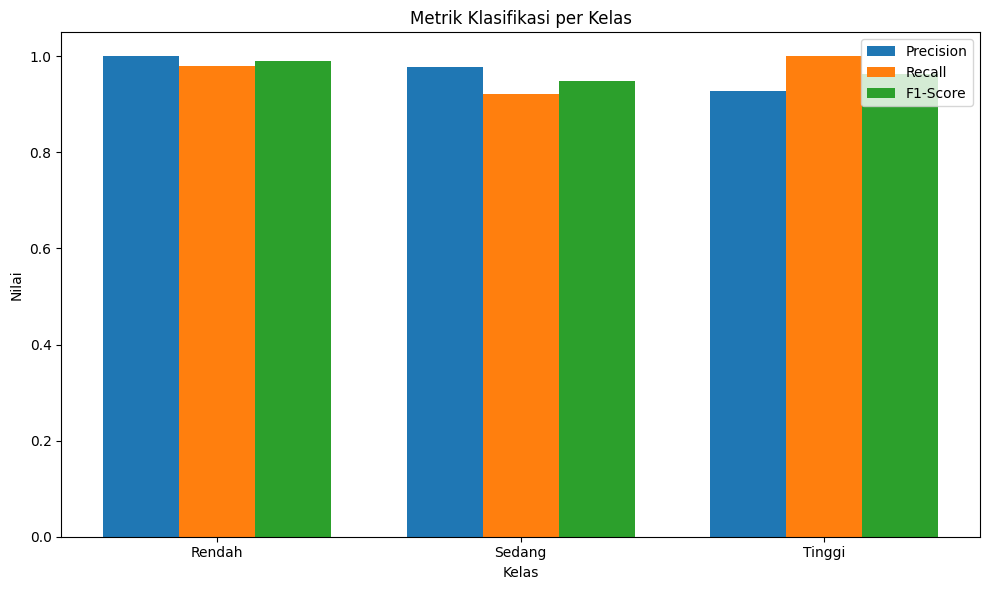

In [27]:
# call 9 9. Classification Report
# 6. Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
report = classification_report(dataset['Tingkat_Stres'], dataset['Kategori_Prediksi'], labels=['Rendah', 'Sedang', 'Tinggi'], zero_division=0)
print(report)

# Visualisasi metrik klasifikasi
report_dict = classification_report(dataset['Tingkat_Stres'], dataset['Kategori_Prediksi'], 
                                    labels=['Rendah', 'Sedang', 'Tinggi'], output_dict=True, zero_division=0)
metrics = ['precision', 'recall', 'f1-score']
classes = ['Rendah', 'Sedang', 'Tinggi']
data = {metric: [report_dict[cls][metric] for cls in classes] for metric in metrics}

# Buat bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(classes))
width = 0.25

ax.bar(x - width, data['precision'], width, label='Precision', color='#1f77b4')
ax.bar(x, data['recall'], width, label='Recall', color='#ff7f0e')
ax.bar(x + width, data['f1-score'], width, label='F1-Score', color='#2ca02c')

ax.set_xlabel('Kelas')
ax.set_ylabel('Nilai')
ax.set_title('Metrik Klasifikasi per Kelas')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()
plt.tight_layout()
plt.show()

In [28]:
# call 10 10. Membership Distribution Analysis
# Cek distribusi derajat keanggotaan
def check_membership_distribution(var, data, var_name):
    print(f"\nDistribusi derajat keanggotaan untuk {var_name}")
    for term in var.terms:
        memberships = [fuzz.interp_membership(var.universe, var[term].mf, x) for x in data]
        active_count = sum(1 for m in memberships if m > 0.1)
        print(f"{term}: {active_count} data memiliki derajat > 0.1")

check_membership_distribution(beban_tugas, dataset['Beban_Tugas'], 'Beban_Tugas')
check_membership_distribution(jam_tidur, dataset['Jam_Tidur'], 'Jam_Tidur')

# Cek cakupan himpunan
def check_coverage(var, data, var_name):
    print(f"\nMemeriksa cakupan untuk {var_name}")
    memberships = np.zeros(len(data))
    for term in var.terms:
        memberships += [fuzz.interp_membership(var.universe, var[term].mf, x) for x in data]
    uncovered = sum(1 for m in memberships if m < 0.1)
    print(f"Data dengan derajat keanggotaan < 0.1: {uncovered} dari {len(data)}")

check_coverage(beban_tugas, dataset['Beban_Tugas'], 'Beban_Tugas')
check_coverage(jam_tidur, dataset['Jam_Tidur'], 'Jam_Tidur')


Distribusi derajat keanggotaan untuk Beban_Tugas
Ringan: 281 data memiliki derajat > 0.1
Sedang: 409 data memiliki derajat > 0.1
Berat: 401 data memiliki derajat > 0.1

Distribusi derajat keanggotaan untuk Jam_Tidur
Sedikit: 211 data memiliki derajat > 0.1
Cukup: 589 data memiliki derajat > 0.1
Banyak: 244 data memiliki derajat > 0.1

Memeriksa cakupan untuk Beban_Tugas
Data dengan derajat keanggotaan < 0.1: 0 dari 1000

Memeriksa cakupan untuk Jam_Tidur
Data dengan derajat keanggotaan < 0.1: 0 dari 1000


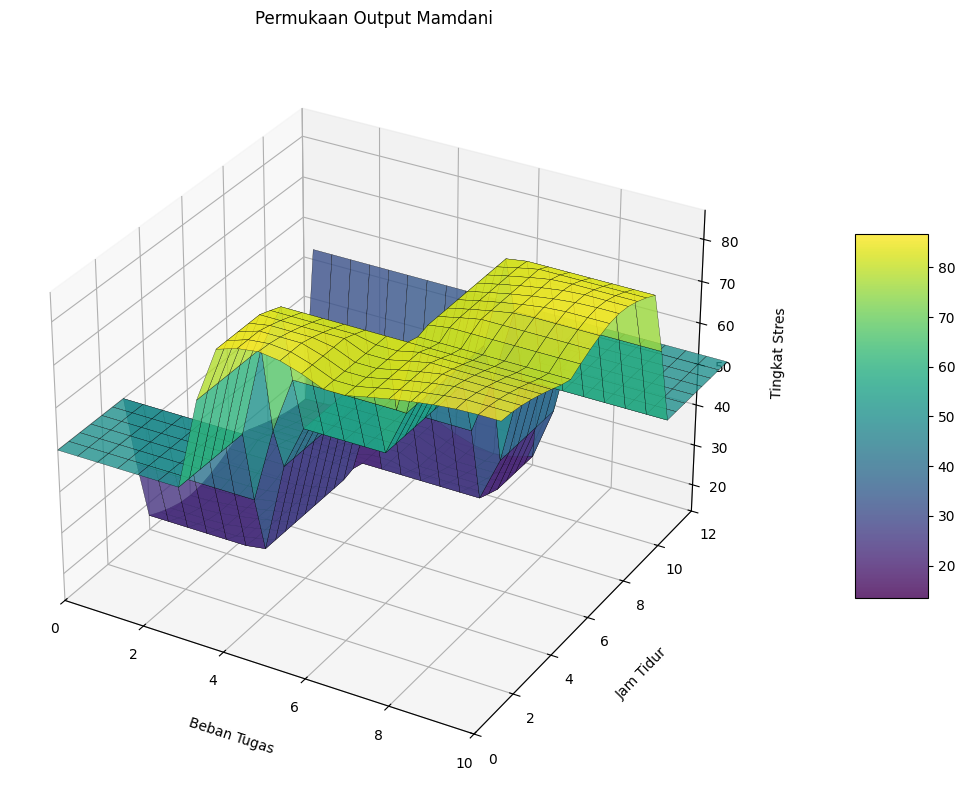

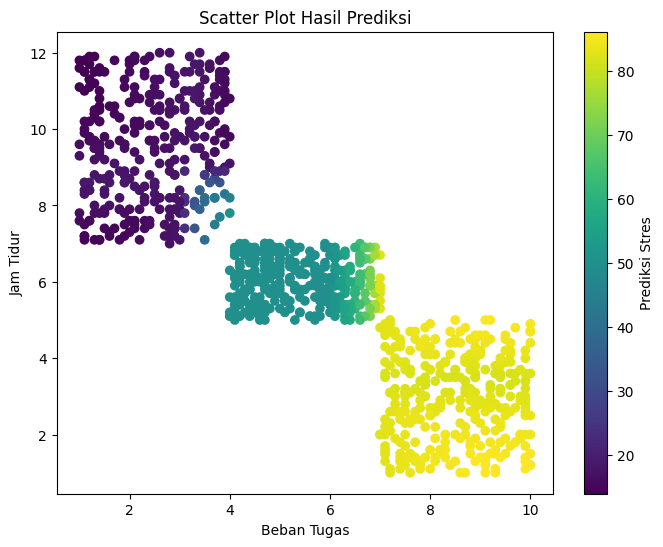

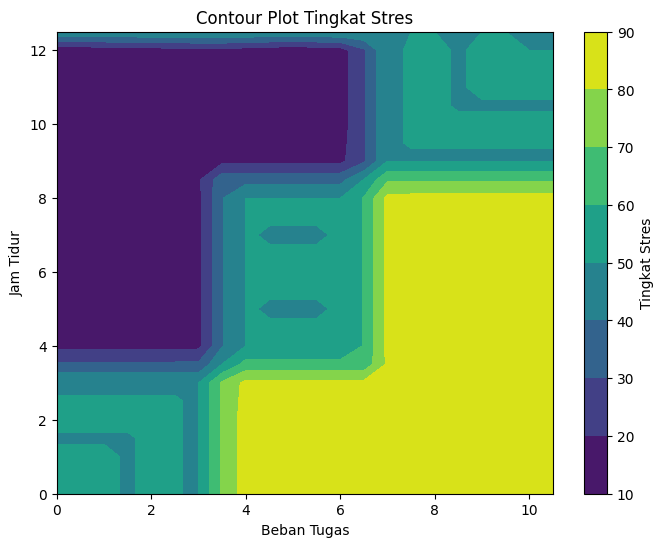

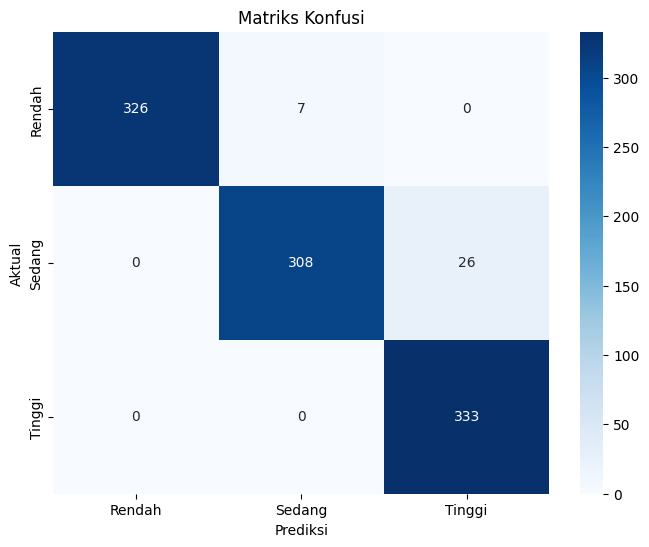

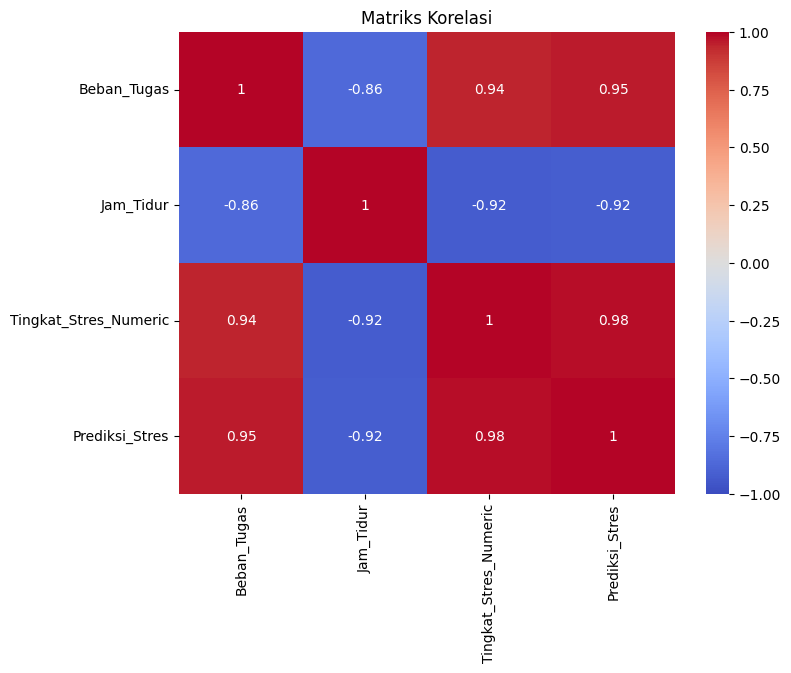

In [32]:
# 8. Visualisasi lainnya
x = np.arange(0, 11, 0.5)
y = np.arange(0, 13, 0.5)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        stres_sim.input['Beban_Tugas'] = X[i, j]
        stres_sim.input['Jam_Tidur'] = Y[i, j]
        try:
            stres_sim.compute()
            Z[i, j] = stres_sim.output['Stres']
        except:
            Z[i, j] = np.nan

fig = plt.figure(figsize=(12, 8))  # Ukuran lebih besar
ax = fig.add_subplot(111, projection='3d')

# Plot surface dengan edgecolor untuk kejelasan
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', linewidth=0.2, alpha=0.8)

# Setting batas sumbu dengan margin
ax.set_xlim([0, 10])
ax.set_ylim([0, 12])
ax.set_zlim([np.nanmin(Z), np.nanmax(Z)])  # Otomatis berdasarkan data

# Label dan title
ax.set_xlabel('Beban Tugas', labelpad=15)
ax.set_ylabel('Jam Tidur', labelpad=15)
ax.set_zlabel('Tingkat Stres', labelpad=15)
plt.title('Permukaan Output Mamdani', pad=20)

# Colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.1)

# Adjust layout
plt.tight_layout()
plt.show()


# Scatter Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(dataset['Beban_Tugas'], dataset['Jam_Tidur'], c=dataset['Prediksi_Stres'], cmap='viridis')
plt.colorbar(scatter, label='Prediksi Stres')
plt.xlabel('Beban Tugas')
plt.ylabel('Jam Tidur')
plt.title('Scatter Plot Hasil Prediksi')
plt.show()

# Contour Plot
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Tingkat Stres')
plt.xlabel('Beban Tugas')
plt.ylabel('Jam Tidur')
plt.title('Contour Plot Tingkat Stres')
plt.show()

# Matriks Konfusi
cm = confusion_matrix(dataset['Tingkat_Stres'], dataset['Kategori_Prediksi'], labels=['Rendah', 'Sedang', 'Tinggi'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rendah', 'Sedang', 'Tinggi'], yticklabels=['Rendah', 'Sedang', 'Tinggi'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matriks Konfusi')
plt.show()

# Matriks Korelasi
plt.figure(figsize=(8, 6))
correlation_matrix = dataset[['Beban_Tugas', 'Jam_Tidur', 'Tingkat_Stres_Numeric', 'Prediksi_Stres']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi')
plt.show()

In [30]:
# call 12 12. Final Results and Saving
# Cek akurasi
accuracy = np.sum(dataset['Tingkat_Stres'] == dataset['Kategori_Prediksi']) / len(dataset)
print(f"\nAkurasi prediksi: {accuracy:.2%}")

# Penjelasan Hasil Akhir jumlah dan persentase kategori stres
jumlah_ringan = sum(dataset['Kategori_Prediksi'] == 'Rendah')
jumlah_sedang = sum(dataset['Kategori_Prediksi'] == 'Sedang')
jumlah_berat = sum(dataset['Kategori_Prediksi'] == 'Tinggi')
total = len(dataset)

persen_ringan = (jumlah_ringan / total) * 100
persen_sedang = (jumlah_sedang / total) * 100
persen_berat = (jumlah_berat / total) * 100

print(f"\nstres ringan = {jumlah_ringan} mahasiswa sebesar ({persen_ringan:.2f}%)")
print(f"stres sedang = {jumlah_sedang} mahasiswa sebesar ({persen_sedang:.2f}%)")
print(f"stres berat = {jumlah_berat} mahasiswa sebesar ({persen_berat:.2f}%)")

# Simpan hasil
dataset.to_csv('hasil_prediksi_stres.csv', index=False)
print("\nHasil prediksi disimpan ke 'hasil_prediksi_stres.csv'")


Akurasi prediksi: 96.70%

stres ringan = 326 mahasiswa sebesar (32.60%)
stres sedang = 315 mahasiswa sebesar (31.50%)
stres berat = 359 mahasiswa sebesar (35.90%)

Hasil prediksi disimpan ke 'hasil_prediksi_stres.csv'
